# 1. Import necessary libraries and data

In [3]:
# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# save filepath to variable for easier access
diabetes_dataset_path = '/content/Dataset of Diabetes .csv'

# read the data and store data 
diabetes_data = pd.read_csv(diabetes_dataset_path) 

# print a summary 
diabetes_data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


# 2. Data analysis

In [5]:
diabetes_data.shape

(1000, 14)

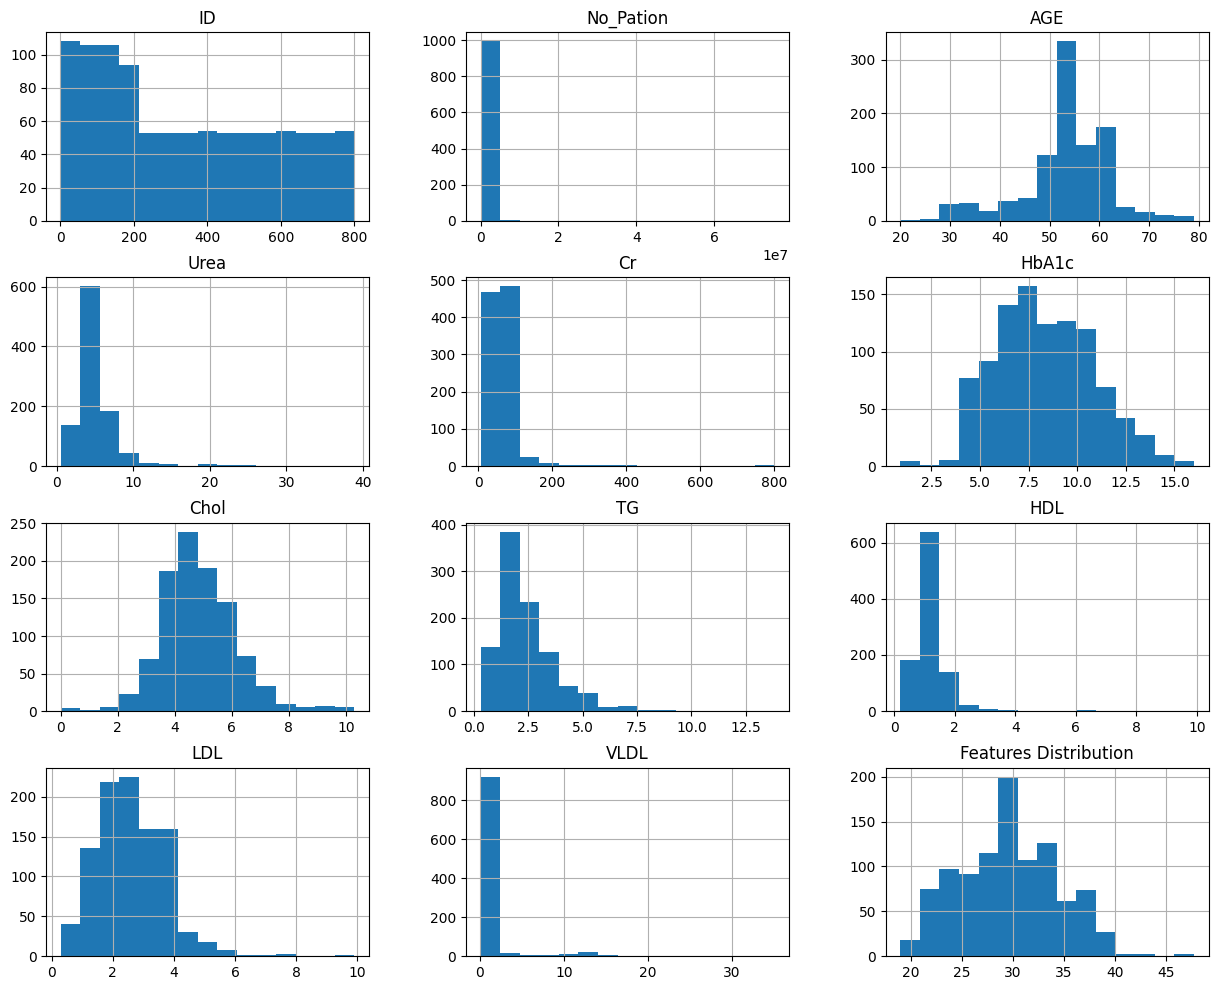

In [6]:
diabetes_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Based on above feature distribution, AGE, HbA1c, Chol, TG, and LDL may be useful for prediction. We will check again with the heatmap later. The range for each features are different so we need to do normalization in data-reprocessing.

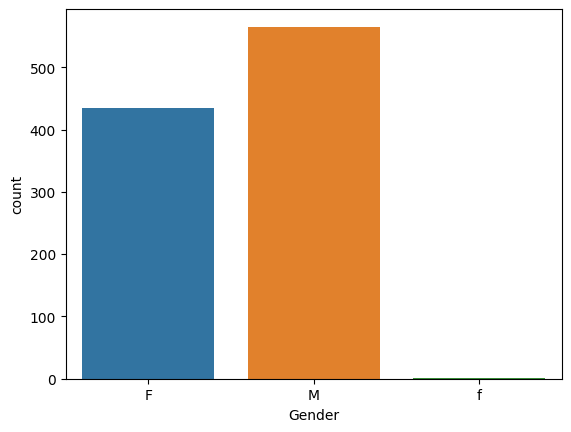

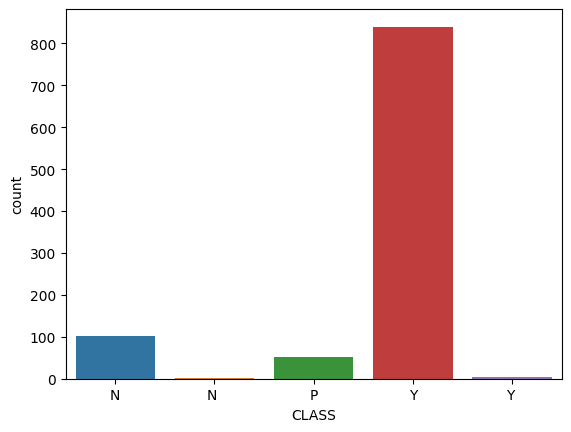

In [7]:
# plot the bar chart of categorical variables
cat_cols = diabetes_data.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    sns.countplot(x=diabetes_data[col])
    plt.show()

There are 3 type of classes that we want to predict:

> N: Non-diabetic (patients that  do not have diabetes)

> P: Predict-diabetic (patients that have risk in having diabetes)

> Y: Diabetic (patients that have diabetes)

In [8]:
# check for missing values
missing_values = diabetes_data.isnull().sum()

# print the number of missing values in each column
print(missing_values)

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


there are no missing values in dataset, hence we do not need to handle it

# Extra

In [9]:
print(missing_values)

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


# 3. Data pre-processing

In [10]:
# Handling categorical variables in dataset
from sklearn.preprocessing import LabelEncoder

# List of categorical variables
cat_vars = ['Gender', 'CLASS']

# Loop through each variable and perform label encoding
for var in cat_vars:
    le = LabelEncoder()
    diabetes_data[var] = le.fit_transform(diabetes_data[var].astype(str))

In [11]:
# Scaling/normalizing numerical values 
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler object to the data and transform the data
normalized_data = scaler.fit_transform(diabetes_data)

# convert the normalized data back to a pandas dataframe
normalized_df = pd.DataFrame(normalized_data, columns=diabetes_data.columns)

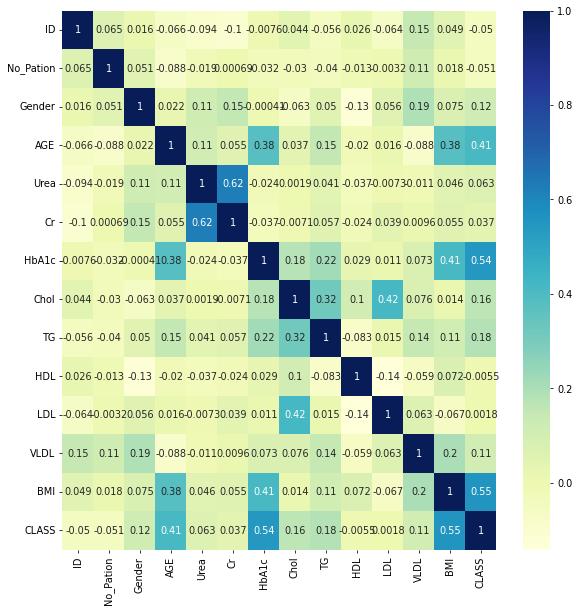

In [12]:
# plot the correlation matrix for feature selection
corr_matrix = normalized_df.corr()
fig = plt.figure(figsize=(10,10), dpi=70)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

 AGE, HbA1c, Chol, TG, VLDL, and BMI - may be useful to predict CLASS

In [13]:
normalized_df.head

<bound method NDFrame.head of            ID  No_Pation  Gender       AGE      Urea        Cr     HbA1c  \
0    0.627034   0.000237     0.0  0.508475  0.109375  0.050378  0.264901   
1    0.918648   0.000452     0.5  0.101695  0.104167  0.070529  0.264901   
2    0.524406   0.000634     0.0  0.508475  0.109375  0.050378  0.264901   
3    0.849812   0.001160     0.0  0.508475  0.109375  0.050378  0.264901   
4    0.629537   0.000452     0.5  0.220339  0.171875  0.050378  0.264901   
..        ...        ...     ...       ...       ...       ...       ...   
995  0.249061   0.006021     0.5  0.864407  0.273438  0.114610  0.403974   
996  0.838548   0.011618     0.5  0.186441  0.065104  0.068010  0.754967   
997  0.836045   0.001160     0.5  0.169492  0.171875  0.094458  0.384106   
998  0.122653   0.000317     0.5  0.305085  0.138021  0.066751  0.384106   
999  0.309136   0.000317     0.5  0.576271  0.117188  0.076826  0.397351   

         Chol        TG       HDL       LDL      VLDL    

In [14]:
print(normalized_df['CLASS'])

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
995    0.75
996    1.00
997    1.00
998    1.00
999    1.00
Name: CLASS, Length: 1000, dtype: float64


In [15]:
# Split dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

X_vars = ['ID', 'No_Pation', 'Gender', 'Urea', 'Cr', 'HDL', 'LDL']

# split the dataset into features and target variable
X = normalized_df.drop(X_vars, axis=1) #drop the unwanted column
y = normalized_df['CLASS']

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Model implementation

## K-mean clustering

In [16]:
from sklearn.cluster import KMeans

# Select features for clustering
features = normalized_df[['CLASS']]

# Specify the number of clusters (k)
k = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the DataFrame
normalized_df['cluster'] = labels

# Print the resulting DataFrame with cluster labels
print(normalized_df.head())


         ID  No_Pation  Gender       AGE      Urea        Cr     HbA1c  \
0  0.627034   0.000237     0.0  0.508475  0.109375  0.050378  0.264901   
1  0.918648   0.000452     0.5  0.101695  0.104167  0.070529  0.264901   
2  0.524406   0.000634     0.0  0.508475  0.109375  0.050378  0.264901   
3  0.849812   0.001160     0.0  0.508475  0.109375  0.050378  0.264901   
4  0.629537   0.000452     0.5  0.220339  0.171875  0.050378  0.264901   

       Chol        TG       HDL       LDL      VLDL       BMI  CLASS  cluster  
0  0.407767  0.044444  0.226804  0.114583  0.011461  0.173913    0.0        1  
1  0.359223  0.081481  0.092784  0.187500  0.014327  0.139130    0.0        1  
2  0.407767  0.044444  0.226804  0.114583  0.011461  0.173913    0.0        1  
3  0.407767  0.044444  0.226804  0.114583  0.011461  0.173913    0.0        1  
4  0.475728  0.051852  0.061856  0.177083  0.008596  0.069565    0.0        1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)


In [22]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 5.000000000000009e-07
Mean Absolute Error: 5.000000000000004e-05


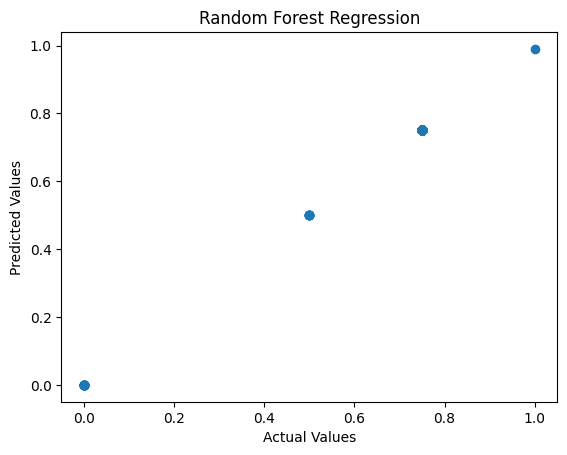

In [23]:
# Visualize the result
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")
plt.show()